# Approximate Dynamic Programming

In [1]:
using Interact
using PGFPlots
using Distributions
include("helpers.jl");

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ce004697c65d3110c59a095f306b23b8a36cc7e5-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ce004697c65d3110c59a095f306b23b8a36cc7e5-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

## Function Approximation

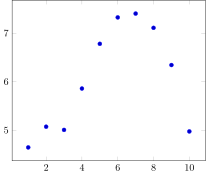

In [2]:
# Generate some random data
using Random
Random.seed!(0)
s = 1:10
u = 4 .- 0.5 * s .+ 0.35 * s.^2 .- 0.03 * s.^3 .+ rand(length(s))
Plots.Scatter(s, u)

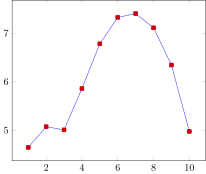

In [3]:
Axis([
        Plots.Linear(s, u),
        Plots.Scatter(s, u)
    ])

In [4]:
using LinearAlgebra
function polyfitFunction(X, Y, order)
    λ = polyfit(X, Y, order) # polyfit in helpers.jl
    β(x) = [float(x)^p for p = 0:order]
    (x) -> LinearAlgebra.dot(λ, β(x))
end;

In [5]:
@manipulate for order in 0:9
    title=prettyPolynomial(polyfit(s, u, order))
    Axis([
        Plots.Linear(polyfitFunction(s, u, order), (1,10)),
        Plots.Scatter(s, u),
        ], title=title)
end    

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:order=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_02", 0, Any[SyncCallback(Scope("knockout-component-1d639f1e-1454-4610-8b23-5f7bef05b497", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["order"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>9,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: displayedvalue")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"value"=>(Observable{Int64}("ob_01", 4, Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##39#41{Scope,String}(Scope(#= circular reference @-8 =#), "value"))), #g#15{##16#17{##11#13,Observable{Any}},Tuple{Observable{Int64}}}(##16#17{##11#13,Observable{Any}}(##11#13(), Observable{Any}("ob_03", Axis(PGFPlots.Plots.Plot[Linear(Real[1.0 1.09091 … 9.90909 10.0; 4.74363 4.71735 … 5.10727 4.95467], "none", nothing, nothing, nothing, nothing, nothing), Scatter(Any[1.0 2.0 … 9.0 10.0; 4.64365 5.07036 … 6.34183 4.97322], nothing, nothing, nothing, nothing, true, nothing)], "\$5.50-1.25 x+0.55x^{2}-0.06x^{3}+0.00x^{4}\$", nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, "axis"), Any[])), (Observable{Int64}(#= circular reference @-4 =#),))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/shushmanchoudhury/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/shushmanchoudhury/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/shushmanchoudhury/.julia/packages/InteractBase/I1FZ7/src/../assets/all.js", "/Users/shushmanchoudhury/.julia/packages/InteractBase/I1FZ7/src/../assets/style.css", "/Users/shushmanchoudhury/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":4}\"

## Cross Entropy Method

In [6]:
# Example true function (has local optima)
V(λ) = 0.5*(exp(-(λ/2).^2) + 2 * exp(-((λ - 10)/2).^2) + 0.75 * exp(-((λ - 5)/2).^2));

In [7]:
# Note: this is designed for univariate functions (easy to generalize, though)
function crossEntropyMethod(f::Function, distribution; steps = 10, populationSize = 20, eliteSize = 5)
    while true
        # draw population of random samples from the distribution
        samples = rand(distribution, populationSize)
        # get the indices of the samples in decreasing order
        index = sortperm(map(f, samples), rev=true)
        # pull off the elite samples
        eliteSamples = samples[index[1:eliteSize]]
        if steps == 0
            return samples, eliteSamples, distribution
        else
            steps = steps - 1
        end
        # update the distribution based on the elite samples
        distribution = fit_mle(Normal, eliteSamples)
    end
end;

In [8]:
initialDistribution = Normal(0, 1)
domain = (-15,15)
@manipulate for steps = 0:4
    Random.seed!(0)
    (samples, eliteSamples, distribution) = crossEntropyMethod(λ->V(λ), Normal(0., 10.), steps = steps)
    densityScale = 1/pdf(distribution, distribution.μ)
    density = λ->densityScale*pdf(distribution, λ)
    Axis([
        Plots.Linear(V, domain),
        Plots.Scatter(samples, map(V, samples), mark="+"),
        Plots.Scatter(eliteSamples, map(V, eliteSamples)),
        Plots.Linear(density, domain)
        ], xmin=domain[1], xmax=domain[2], ymin=0
    )
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:steps=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_07", 0, Any[SyncCallback(Scope("knockout-component-934aaa52-cff7-4003-8cbc-589c8170c0fd", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["steps"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>4,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: displayedvalue")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"value"=>(Observable{Int64}("ob_06", 2, Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##39#41{Scope,String}(Scope(#= circular reference @-8 =#), "value"))), #g#15{##16#17{##16#20,Observable{Any}},Tuple{Observable{Int64}}}(##16#17{##16#20,Observable{Any}}(##16#20(), Observable{Any}("ob_08", Axis(PGFPlots.Plots.Plot[Linear(Real[-15.0 -14.697 … 14.697 15.0; 1.86168e-25 1.76591e-24 … 0.00402439 0.00193045], "none", nothing, nothing, nothing, nothing, nothing), Scatter(Any[9.75112 8.09759 … 8.69776 6.04525; 0.985962 0.438688 … 0.666738 0.305464], "+", nothing, nothing, nothing, true, nothing), Scatter(Any[9.94811 9.81368 … 10.5944 9.26707; 1.00015 0.992503 … 0.915621 0.878285], nothing, nothing, nothing, nothing, true, nothing), Linear(Real[-15.0 -14.697 … 14.697 15.0; 1.13049e-29 6.1223e-29 … 0.0155871 0.0100824], "none", nothing, nothing, nothing, nothing, nothing)], nothing, nothing, nothing, nothing, nothing, nothing, nothing, -15, 15, 0, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, "axis"), Any[])), (Observable{Int64}(#= circular reference @-4 =#),))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/shushmanchoudhury/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/shushmanchoudhury/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/shushmanchoudhury/.julia/packages/InteractBase/I1FZ7/src/../assets/all.js", "/Users/shushmanchoudhury/.julia/packages/InteractBase/I1FZ7/src/../assets/style.css", "/Users/shushmanchoudhury/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n        

# Function Approximation Value Iteration

In [9]:
using ContinuumWorld
using POMDPs
using Interact
value = Interact.value
using GridInterpolations
using Plots
pyplot() # or you can use e.g. gr() or plotly()

LoadError: ArgumentError: Package ContinuumWorld not found in current path:
- Run `Pkg.add("ContinuumWorld")` to install the ContinuumWorld package.


In [10]:
w = CWorld()

dummy_s = Vec2(0.0, 0.0)
dummy_a = Vec2(0.0, 0.0)
plot(CWorldVis(w, f=sp->reward(w,dummy_s,dummy_a,sp)))

LoadError: UndefVarError: CWorld not defined

In [11]:
nx = 30
ny = 30
grid = RectangleGrid(linspace(w.xlim..., nx), linspace(w.ylim..., ny))

sol = CWorldSolver(max_iters=50, m=50, grid=grid)

@time policy = solve(sol, w);

LoadError: UndefVarError: w not defined

In [12]:
@manipulate for i in 1:length(sol.value_hist)
    v = sol.value_hist[i]
    plot(CWorldVis(w, f=s->evaluate(v, s), g=sol.grid, title="Iteration $i"))
end

LoadError: UndefVarError: sol not defined

In [13]:
plot(CWorldVis(w, f=s->action_ind(policy, s), g=sol.grid, title="Policy"))

LoadError: UndefVarError: sol not defined